# AutoGen Basics
## 4 Basic steps
1. Define configuration list
2. Define the assistant
3. Define the user
4. Initiate chat (solve the task)

In [29]:
# !pip install autogen

In [16]:
# source: https://github.com/microsoft/autogen/blob/main/test/twoagent.py
%matplotlib inline
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json
from autogen.coding import LocalCommandLineCodeExecutor

# Load LLM inference endpoints from an env variable or a file
# See https://microsoft.github.io/autogen/docs/FAQ#set-your-api-endpoints
# and OAI_CONFIG_LIST_sample

config_list = config_list_from_json(env_or_file="OAI_CONFIG_LIST")

In [17]:
assistant = AssistantAgent("assistant", llm_config={"config_list": config_list})

In [18]:
from pathlib import Path

work_dir = Path("coding")
code_executor = LocalCommandLineCodeExecutor(work_dir=work_dir)

![](2024-10-01-16-53-30.png)

Image taken from [AutoGen docs](https://microsoft.github.io/autogen/docs/tutorial/code-executors/)

In [19]:
user_proxy = UserProxyAgent("user_proxy", code_execution_config={"executor": code_executor})

In [20]:
user_proxy.initiate_chat(assistant, message="Plot a chart of NVDA and TESLA stock price change YTD and save it under stock_price_change_ytd.png")

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD and save it under stock_price_change_ytd.png

--------------------------------------------------------------------------------
assistant (to user_proxy):

To achieve this, we will follow these steps:

1. Fetch the Year-to-Date (YTD) stock price data for NVDA (NVIDIA) and TSLA (Tesla) using an API such as Alpha Vantage or Yahoo Finance.
2. Process the data to calculate the price change percentage.
3. Plot the stock price change percentage and save it as an image file named `stock_price_change_ytd.png`.

We will use the `yfinance` library to fetch the stock data and `matplotlib` for plotting.

Here is the Python code to accomplish this task:

```python
# filename: stock_price_change_ytd.py

import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# Get the current date
end_date = datetime.datetime.now().date()
# Get the first trading day of the current year
start_date = datetime.date(end_date.

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a chart of NVDA and TESLA stock price change YTD and save it under stock_price_change_ytd.png', 'role': 'assistant', 'name': 'user_proxy'}, {'content': "To achieve this, we will follow these steps:\n\n1. Fetch the Year-to-Date (YTD) stock price data for NVDA (NVIDIA) and TSLA (Tesla) using an API such as Alpha Vantage or Yahoo Finance.\n2. Process the data to calculate the price change percentage.\n3. Plot the stock price change percentage and save it as an image file named `stock_price_change_ytd.png`.\n\nWe will use the `yfinance` library to fetch the stock data and `matplotlib` for plotting.\n\nHere is the Python code to accomplish this task:\n\n```python\n# filename: stock_price_change_ytd.py\n\nimport yfinance as yf\nimport matplotlib.pyplot as plt\nimport datetime\n\n# Get the current date\nend_date = datetime.datetime.now().date()\n# Get the first trading day of the current year\nstart_date = datetime.date(end_date.year, 1

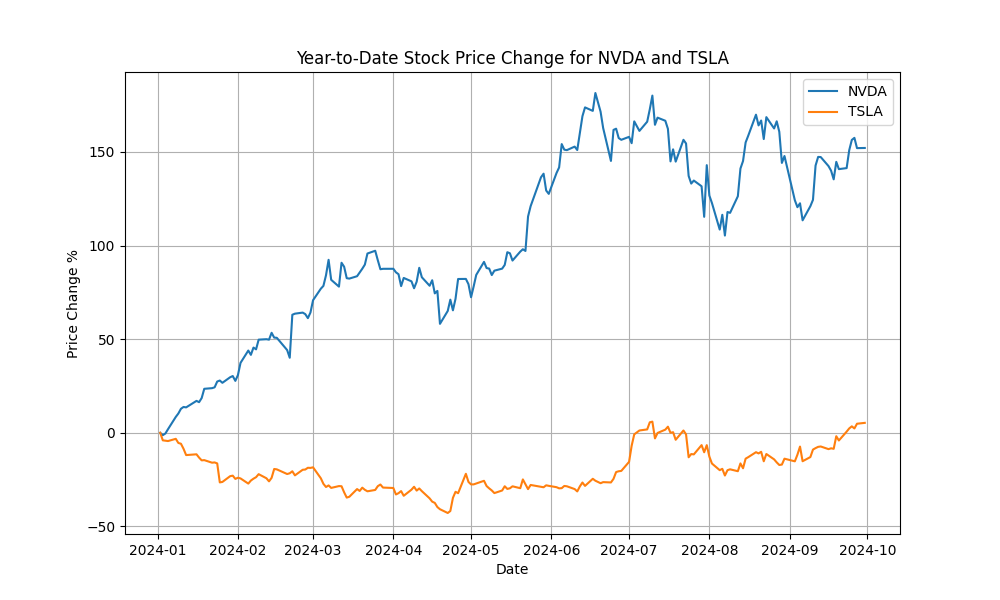

In [21]:
from IPython.display import Image

# Specify the path to the image file
image_path = "./coding/stock_price_change_ytd.png"

# Display the image
Image(filename=image_path)